Helpful resource: http://brandonrose.org/clustering



# Document Clustering

This notebook runs K-Means clustering on my data.

### Table of Contents
- [Loading Data](#loading-data) 
- [Vectorizing](#tfidf-vectors) is where I fix X, Y and Z
- [K-Means](#k-means) is where I convert A to B
- [t-SNE visualization](#t-sne) rounds up with some observations
- [Results](#results) 

Note: `reformat.py` contains some important code used to preprocess the outputted wiki dump from the [wikiextractor](wikiextractor).

This notebook will open a few sample JSON files and attempt to cluster them and label the clusters.

In [2]:
import json
import glob
import random

wiki_articles = []
for x in glob.glob('data/wiki*.json'):
    new_articles = json.load(open(x))['articles']
    wiki_articles += new_articles
wiki_articles[0].keys()


dict_keys(['text', 'title', 'id', 'url'])

In [3]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.8, max_features=20000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, ngram_range=(1,3))
wiki_articles_text = [x['text'] for x in wiki_articles]
wiki_articles_titles = [x['title'] for x in wiki_articles]
tfidf_vectors = tfidf.fit_transform(wiki_articles_text)

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
dist = 1 - cosine_similarity(tfidf_vectors)


In [23]:
import matplotlib
matplotlib.rcParams.update({'font.size': 1})

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(40, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="top", labels=wiki_articles_titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    )
plt.yticks(fontsize=3)
#plt.tight_layout() #show plot with tight layout
plt.savefig('hierarchical.png', dpi=300)

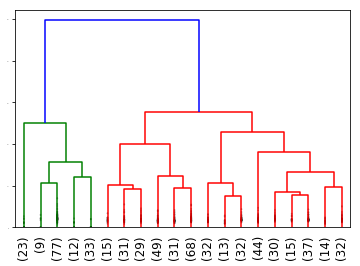

In [15]:
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',
    p=20,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.savefig('hierarchical_trimmed.png', dpi=300)
plt.show()
